# Plot the jet $p_T$ response as a function of gen jet $p_T$

In [1]:
import uproot
import uproot_methods
import awkward
import matplotlib.pyplot as plt
import numpy as np
import time


In [2]:
files = [
#'9D0F80E3-0098-6E49-95D0-DB32523E776B.root'
'root://cmsxrootd.fnal.gov://store/mc/RunIIFall17NanoAODv4/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/10000/9D0F80E3-0098-6E49-95D0-DB32523E776B.root',
#'root://cmsxrootd.fnal.gov://store/mc/RunIIFall17NanoAODv4/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/10000/DE7F4471-DAA5-D743-9622-689BCAAD9734.root',
#'root://cmsxrootd.fnal.gov://store/mc/RunIIFall17NanoAODv4/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/10000/5E6977DD-34BE-A34F-805D-CE43A9F569F2.root',
#'root://cmsxrootd.fnal.gov://store/mc/RunIIFall17NanoAODv4/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/10000/86087F2B-6029-5542-88CF-AA5B894C0D33.root',
#'root://cmsxrootd.fnal.gov://store/mc/RunIIFall17NanoAODv4/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/10000/019778D1-7269-3D42-8D91-74A99B71E22F.root',
#'root://cmsxrootd.fnal.gov://store/mc/RunIIFall17NanoAODv4/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/10000/B10C3DE9-2178-E04E-909C-E91DCECE3185.root',
#'root://cmsxrootd.fnal.gov://store/mc/RunIIFall17NanoAODv4/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/10000/B28E22BC-C1BB-C04C-BD1A-FA0A930DDFAA.root',
#'root://cmsxrootd.fnal.gov://store/mc/RunIIFall17NanoAODv4/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/10000/ABA48E6B-F147-D340-A38F-BCF61E1DA7C0.root',
#'root://cmsxrootd.fnal.gov://store/mc/RunIIFall17NanoAODv4/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/10000/1BFDC330-F543-104B-9238-D81833427A0F.root',
#'root://cmsxrootd.fnal.gov://store/mc/RunIIFall17NanoAODv4/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/10000/B433E425-6A52-6647-91F6-849F6A076C3D.root',
#'root://cmsxrootd.fnal.gov://store/mc/RunIIFall17NanoAODv4/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/10000/57F42A2E-A3B5-0C4D-AC24-6B67DE2D9500.root',
]

## Get a list of the four-vectors from AK4 RECO and GEN jets

In [3]:

jet_names = ['Jet_pt', 'Jet_eta', 'Jet_phi', 'Jet_mass']
gen_names = ['GenJet_pt', 'GenJet_eta', 'GenJet_phi', 'GenJet_mass']
#T = uproot.open("/uscms/home/rappocc/nobackup/analysis/B2G/CMSSW_10_2_9/src/Analysis/TTbarAllHad/test/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8_RunIIFall17NanoAODv4_example.root")["Events"]
rbins = [i * 0.01 for i in range(300)]
ptbins = [10,20,30,40,50,60,80,100,150,200,250,300,350,400,500,600,700,800,900,1000]
hists = []
start_time = time.perf_counter()
nev = 0
for T in uproot.iterate(files, 'Events', jet_names + gen_names, entrysteps=10000):

    Jet_pt = T[b'Jet_pt']
    Jet_eta = T[b'Jet_eta']
    Jet_phi = T[b'Jet_phi']
    Jet_mass = T[b'Jet_mass']
    GenJet_pt = T[b'GenJet_pt']
    GenJet_eta = T[b'GenJet_eta']
    GenJet_phi = T[b'GenJet_phi']
    GenJet_mass = T[b'GenJet_mass']


    jets = uproot_methods.TLorentzVectorArray.from_ptetaphim(Jet_pt, Jet_eta, Jet_phi, Jet_mass)
    genjets = uproot_methods.TLorentzVectorArray.from_ptetaphim(GenJet_pt, GenJet_eta, GenJet_phi, GenJet_mass)
    
    
    goodjets_index = jets.pt > 30.
    goodgens_index = genjets.pt > 10.
    goodjets = jets[goodjets_index]
    goodgens = genjets[goodgens_index]    
    
    pairing = goodjets.cross(goodgens, nested=True)
    metric = pairing.i0.delta_r(pairing.i1)
    index_of_minimized = metric.argmin()
    passes_cut = (metric[index_of_minimized] < 0.4)
    best_pairings_that_pass_cut = pairing[index_of_minimized][passes_cut]
    genrecos = best_pairings_that_pass_cut.flatten(axis=1)
    

    ptresponse = genrecos.i0.pt / genrecos.i1.pt
    H,xedges,yedges=np.histogram2d(x=genrecos.i1.pt.flatten(), y=ptresponse.flatten(), bins=[ptbins,rbins])
    hists.append(H)
    nev += 1
    
cpu_time = time.perf_counter() - start_time
print ('Processing time: ', cpu_time, ',  nev: ', nev) 

Processing time:  1269.5288473702967 ,  nev:  126


In [4]:
hist = sum( hists )

## And plot them

NOTE: Not plotting bins with fewer than 10 entries

In [5]:
# Set fonts (from https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot)
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

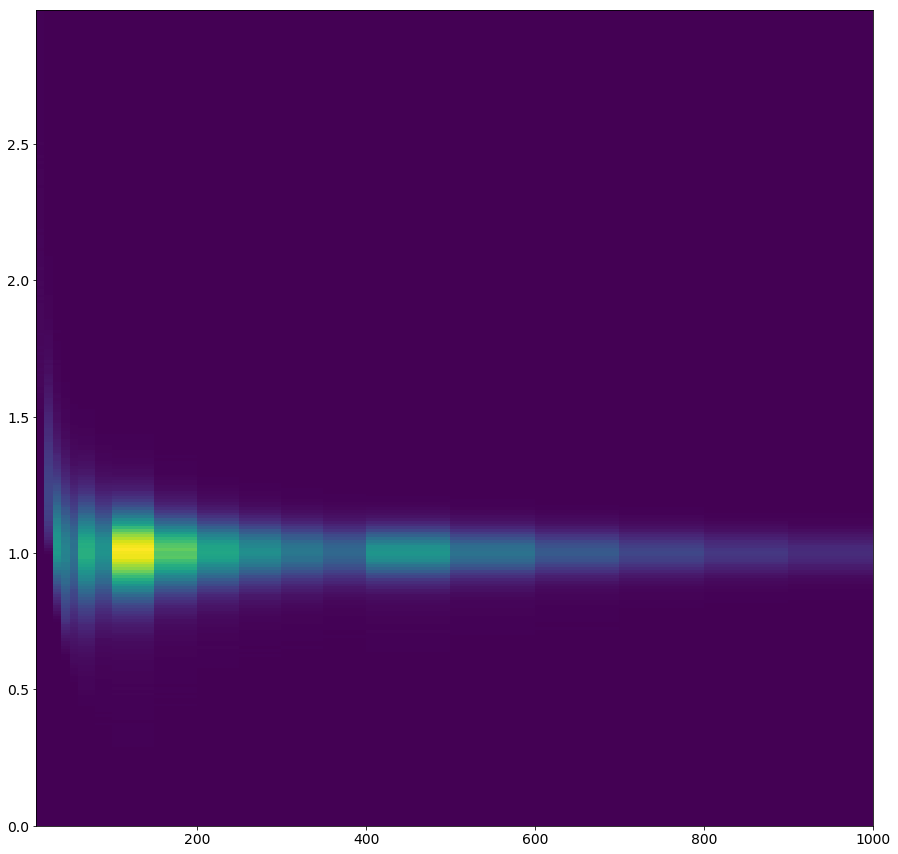

In [6]:
X,Y=np.meshgrid(xedges,yedges)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, hist.T)
